## 다항회귀(Polynomial Linear Regression)

- 단순한 선형회귀법은 데이터를 잘 설명하지 못한다. 조금 더 데이터에 맞게 모델을 학습하기 위해 2차식의 형태로 표현한 것이 다항회귀이다.
- 다항식 회귀 분석은 다중 선형 회귀 분석과 원리가 같다. 다만 데이터에 전처리를 함으로써 새로운 변수 간의 조합을 만들어낸 뒤 회귀 분석을 진행하는 것이 차이이다.
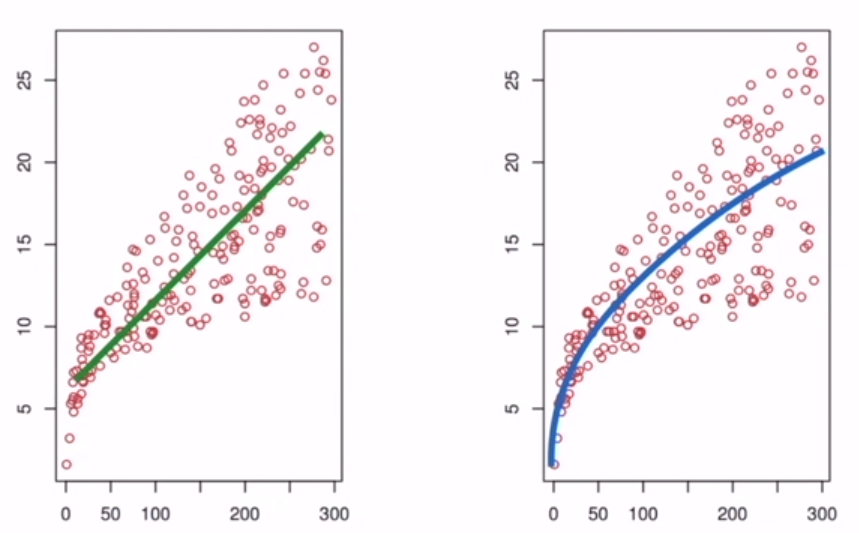

### MSE
- MSE란 평균제곱오차를 의미하며, 통계적 추정에 대한 정확성의 지표로 널리 이용된다.
- 수식: 
$ \frac{1}{N}​\sum_{i}^N​(y^{(i)}−(β_0​x^{(i)}+β_1​))^2$
    - N은 데이터의 개수를 의미


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ./data/Advertising.csv 에 위치한 파일로부터 데이터를 읽어 X와 Y를 만듭니다.
import csv
csvreader = csv.reader(open("data_Advertising.csv"))

# X는 (200, 3) shape을 가진 2차원 np.array로 , TV, Newspaper Column에 해당하는 데이터를 저장합니다. 
# Y는 (200,) 의 shape을 가진 1차원 np.array로 Sales Column에 해당하는 데이터를 저장합니다.
x = []
y = []

next(csvreader)
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ] # 'FB', 'TV', 'Newspaper'
    y_i = float(line[4]) # Sales
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듭니다.

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 합니다.

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장해야 합니다.
Y는 Sales column 에 해당하는 데이터를 저장해야 합니다.
'''

# 다항식 회귀분석을 진행하기 위해 변수들을 조합합니다.
X_poly = []
for x_i in X:
    X_poly.append([
        x_i[1] ** 2, # X_1^2
        x_i[0], # X_2
        x_i[0] * x_i[2], # X_2 * X_3
        x_i[2] # X_3
    ])

# X, Y를 80:20으로 나눕니다. 80%는 트레이닝 데이터, 20%는 테스트 데이터입니다.
x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)

# x_train, y_train에 대해 다항식 회귀분석을 진행합니다.
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

#x_train에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구합니다.
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구합니다. 이 값이 1 미만이 되도록 모델을 구성해 봅니다.
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("MSE on test data: {}".format(mse_test))

MSE on train data: 2.5670141067209284
MSE on test data: 4.667851270381228
